## Introduction

This jupyter notebook uses machine learning classifiers to classify whether a person has heart disease or not.

### The dataset
The dataset was taken from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci and was created by Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. in collaboration with University Hospital, Zurich, Switzerland: William Steinbr. The original creators of this dataset are:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

### Description of the dataset
There are 13 attributes and 1 target variable in this dataset spawning over 297 rows.
The description of the dataset (as described in the original source) iis as follows:
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
- -- Value 0: typical angina
- -- Value 1: atypical angina
- -- Value 2: non-anginal pain
- -- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- -- Value 0: normal
- -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- -- Value 0: upsloping
- -- Value 1: flat
- -- Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
and the target variable is:
- condition: 0 = no disease, 1 = disease

### Import necessary libraries

In [1]:
#import warnings and ignore so warnings are not displayed and the report looks professional
import warnings
warnings.filterwarnings('ignore')

#import necessary libraries

#data manipulation
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, roc_curve

### Load the dataset:

In [2]:
#load dataset
df = pd.read_csv("heart_cleveland_upload.csv")

### Data cleaning and preprocessing
### Glimpse of the dataset

In [3]:
#display the head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Description of the dataset

In [4]:
#description of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


### Finding null values in the dataset

In [5]:
#find if any values are null
df.isnull().any()

age          False
sex          False
cp           False
trestbps     False
chol         False
fbs          False
restecg      False
thalach      False
exang        False
oldpeak      False
slope        False
ca           False
thal         False
condition    False
dtype: bool

Since there are no missing values, and all the values in the dataset are already in the numerical format (as opposed to categorical where we need to convert into numerical), the dataset can be used as is for further processes (such as visualizations)

### Goals of this project:
The goal of this project is to understand the data in-depth (visually) and build a classification model that can predict whether or not there is a heart condition for the provided details

### Exploratory Data Analysis

### Understanding the age distribution

<AxesSubplot:xlabel='age', ylabel='count'>

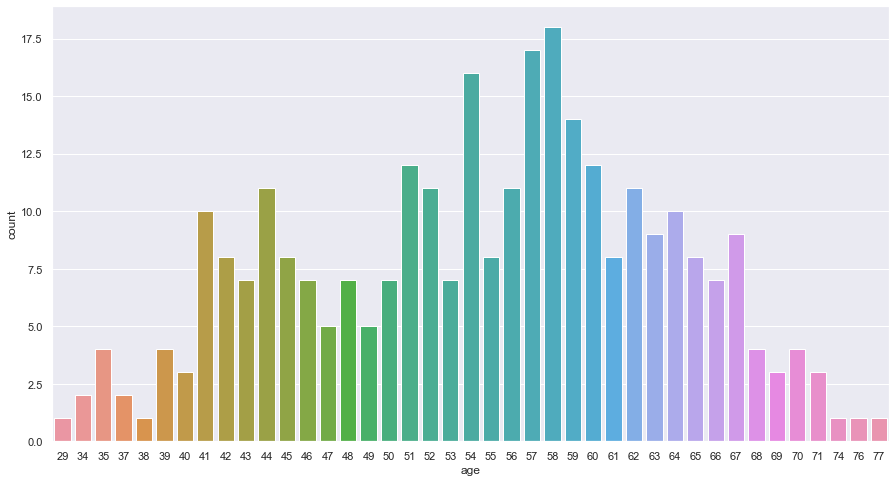

In [6]:
#plot a countplot of age
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='age', data=df)

The age seems to follow a normal distribution (more or less) with most of the patient's age ranging at 50s

### Age vs Sex of the patients

[Text(0.5, 0, 'Age of the patients')]

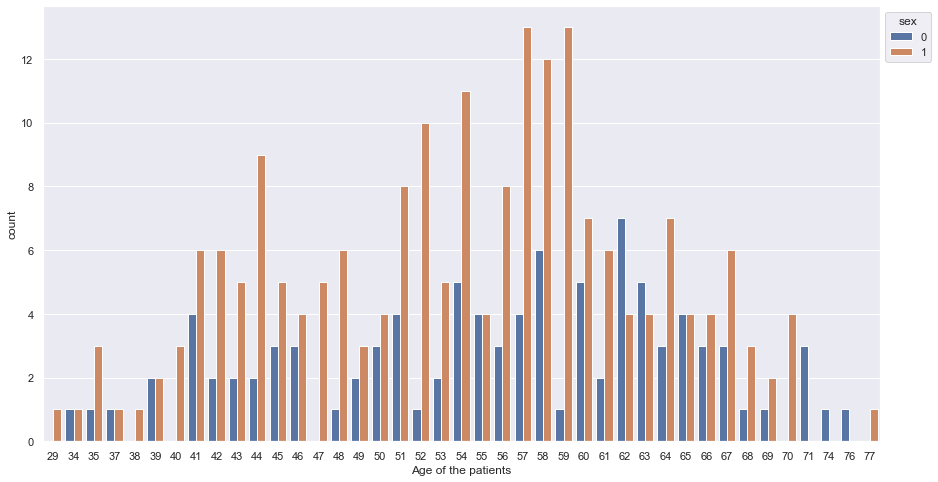

In [7]:
#count of plot of age with hue sex
p = sns.countplot(data=df, x='age', hue='sex')

#display the legend
p.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')


#set the label
p.set(xlabel='Age of the patients')

1 is male
0 is female.
With this we can see that there are more number of male patients consulting rather than females at every age group.

### Sex vs Whether they have disease or not

[Text(0.5, 0, 'Sex of the patients')]

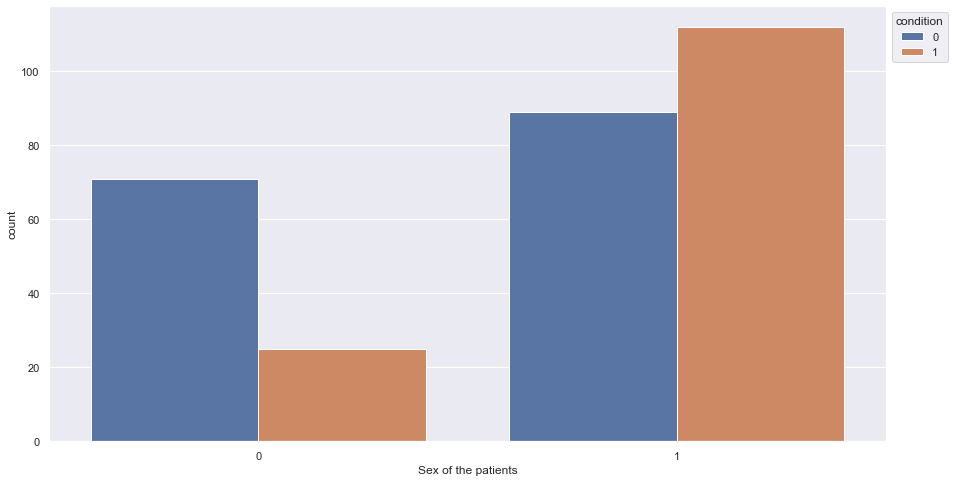

In [8]:
#count plot of sex with hue condition
p = sns.countplot(data=df, x='sex', hue='condition')
p.legend(title='condition', bbox_to_anchor=(1, 1), loc='upper left')
p.set(xlabel='Sex of the patients')

- In the x axis: 0 represents female and 1 represents male
- In the y axis: 0 represents no disease, 1 represents disease
- This represents that male patients had disease count more than the female patients

### Correlation heatmap of the dataset

<AxesSubplot:>

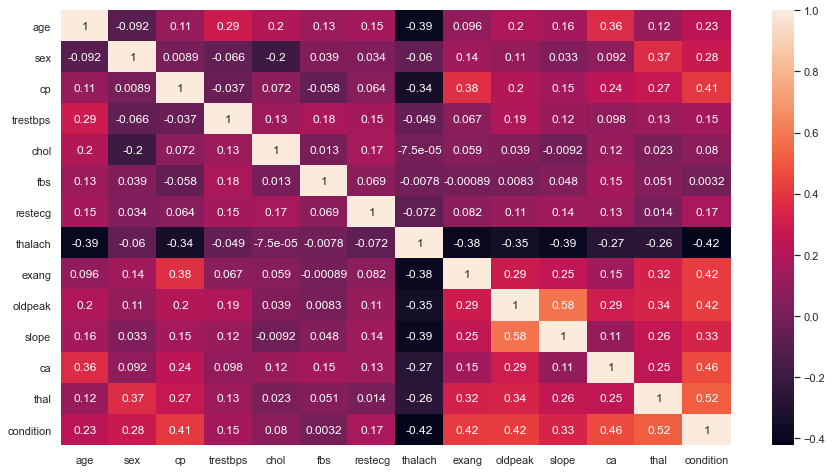

In [9]:
#draw a heatmap of correlations
sns.heatmap(df.corr(), annot= True)

lightest colors have high correlation, darkest have none

### Outlier removal

There are 4 attributes that contain categorical data, understand this data to remove any outliers

### Outliers for trestbps

<AxesSubplot:xlabel='trestbps'>

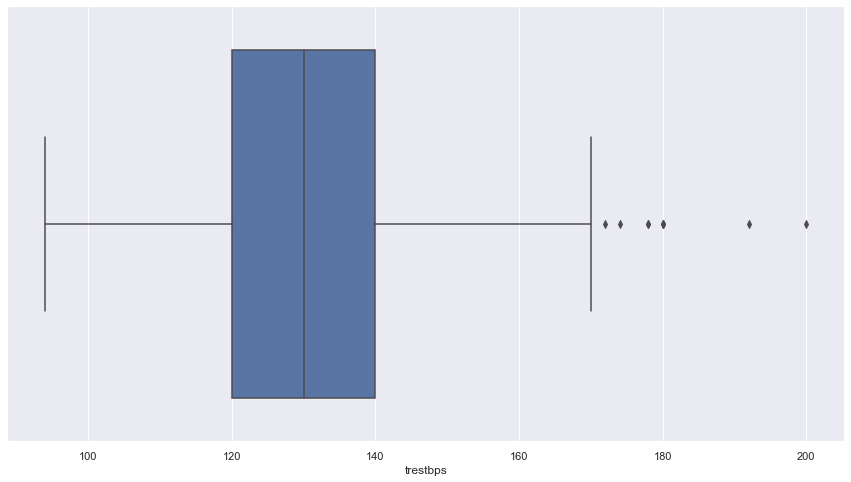

In [10]:
#boxplots to find outliers and spread of data
sns.boxplot(df['trestbps'])

As we can see there are outliers for this dataset containing values greater than 170, hence dropping these values from the dataset 

In [11]:
#after finding the outlier, drop from original table
df = df.drop(df[(df['trestbps']>170)].index)

<AxesSubplot:xlabel='trestbps'>

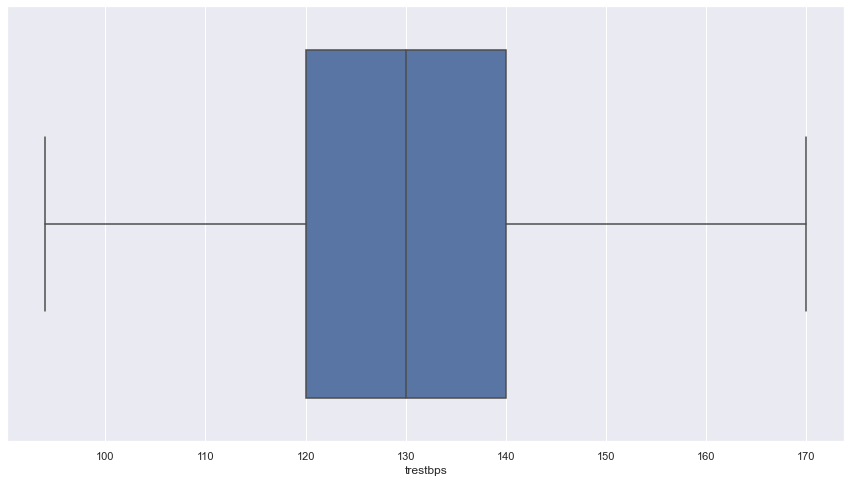

In [12]:
#boxplot
sns.boxplot(df['trestbps'])

### Outliers for chol

<AxesSubplot:xlabel='chol'>

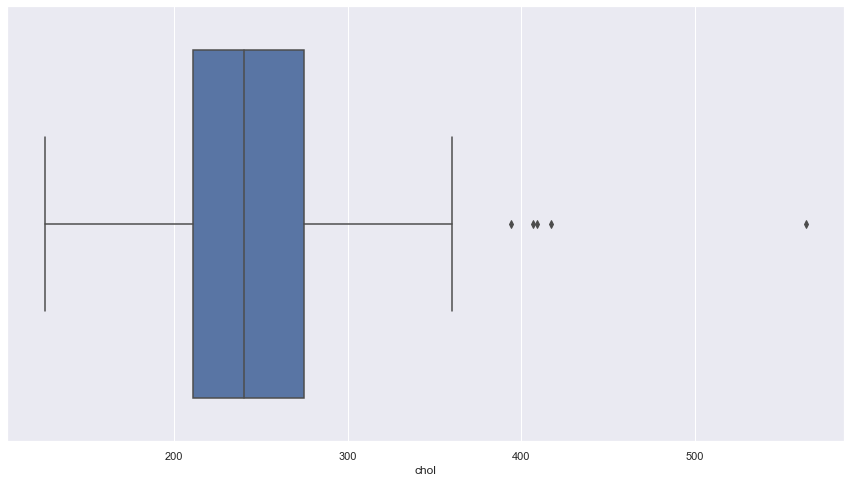

In [13]:
sns.boxplot(df['chol'])

As we can see, there are outliers when the chol value is greater than around 350, hence dropping these values

<AxesSubplot:xlabel='chol'>

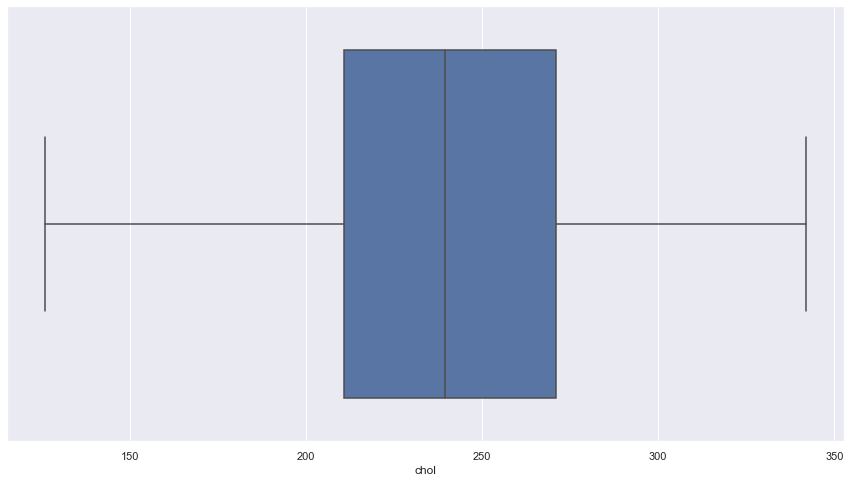

In [14]:
df = df.drop(df[(df['chol']>350)].index)
sns.boxplot(df['chol'])

### Outliers for thalach

<AxesSubplot:xlabel='thalach'>

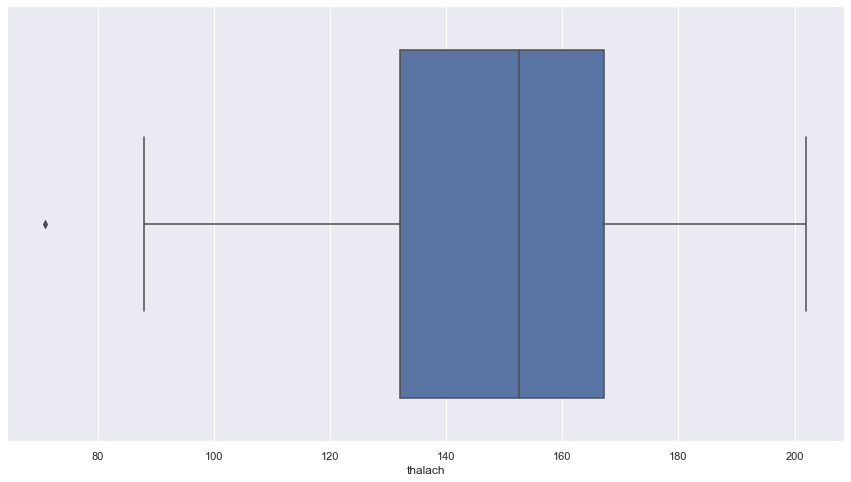

In [15]:
sns.boxplot(df['thalach'])

There is one outlier whose value is less than 80

<AxesSubplot:xlabel='thalach'>

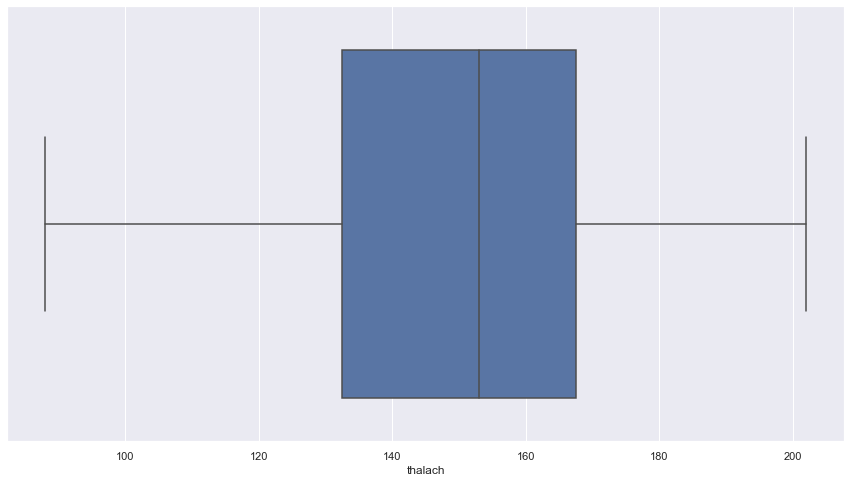

In [16]:
df = df.drop(df[(df['thalach']<80)].index)
sns.boxplot(df['thalach'])

### Outliers for oldpeak

<AxesSubplot:xlabel='oldpeak'>

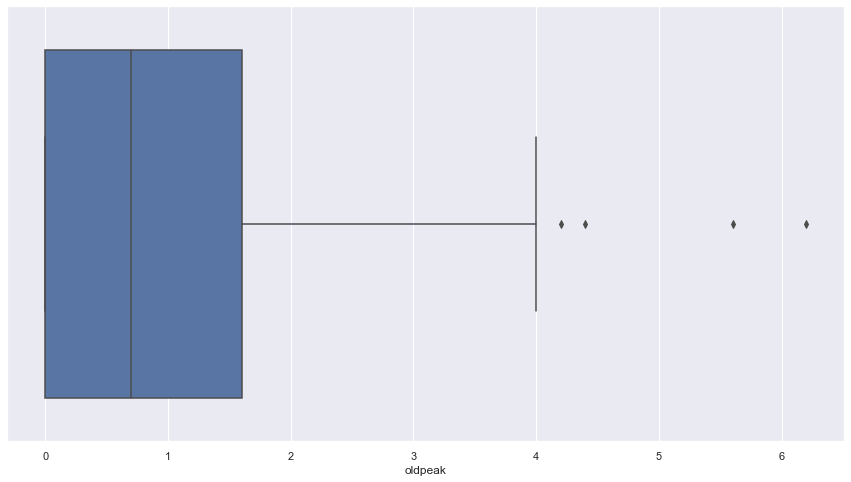

In [17]:
sns.boxplot(df['oldpeak'])

The outliers are found for values containing greater than 4, hence removing those values from the original dataset

<AxesSubplot:xlabel='oldpeak'>

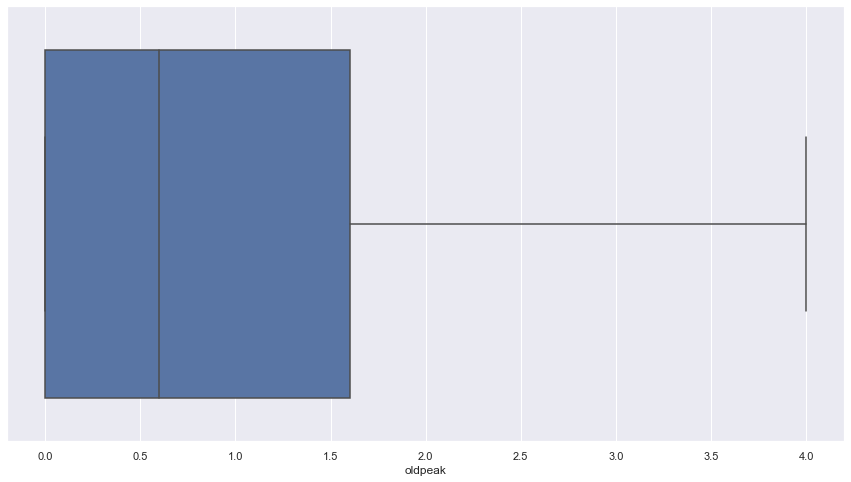

In [18]:
df = df.drop(df[(df['oldpeak']>4)].index)
sns.boxplot(df['oldpeak'])

### Pair plot of the data

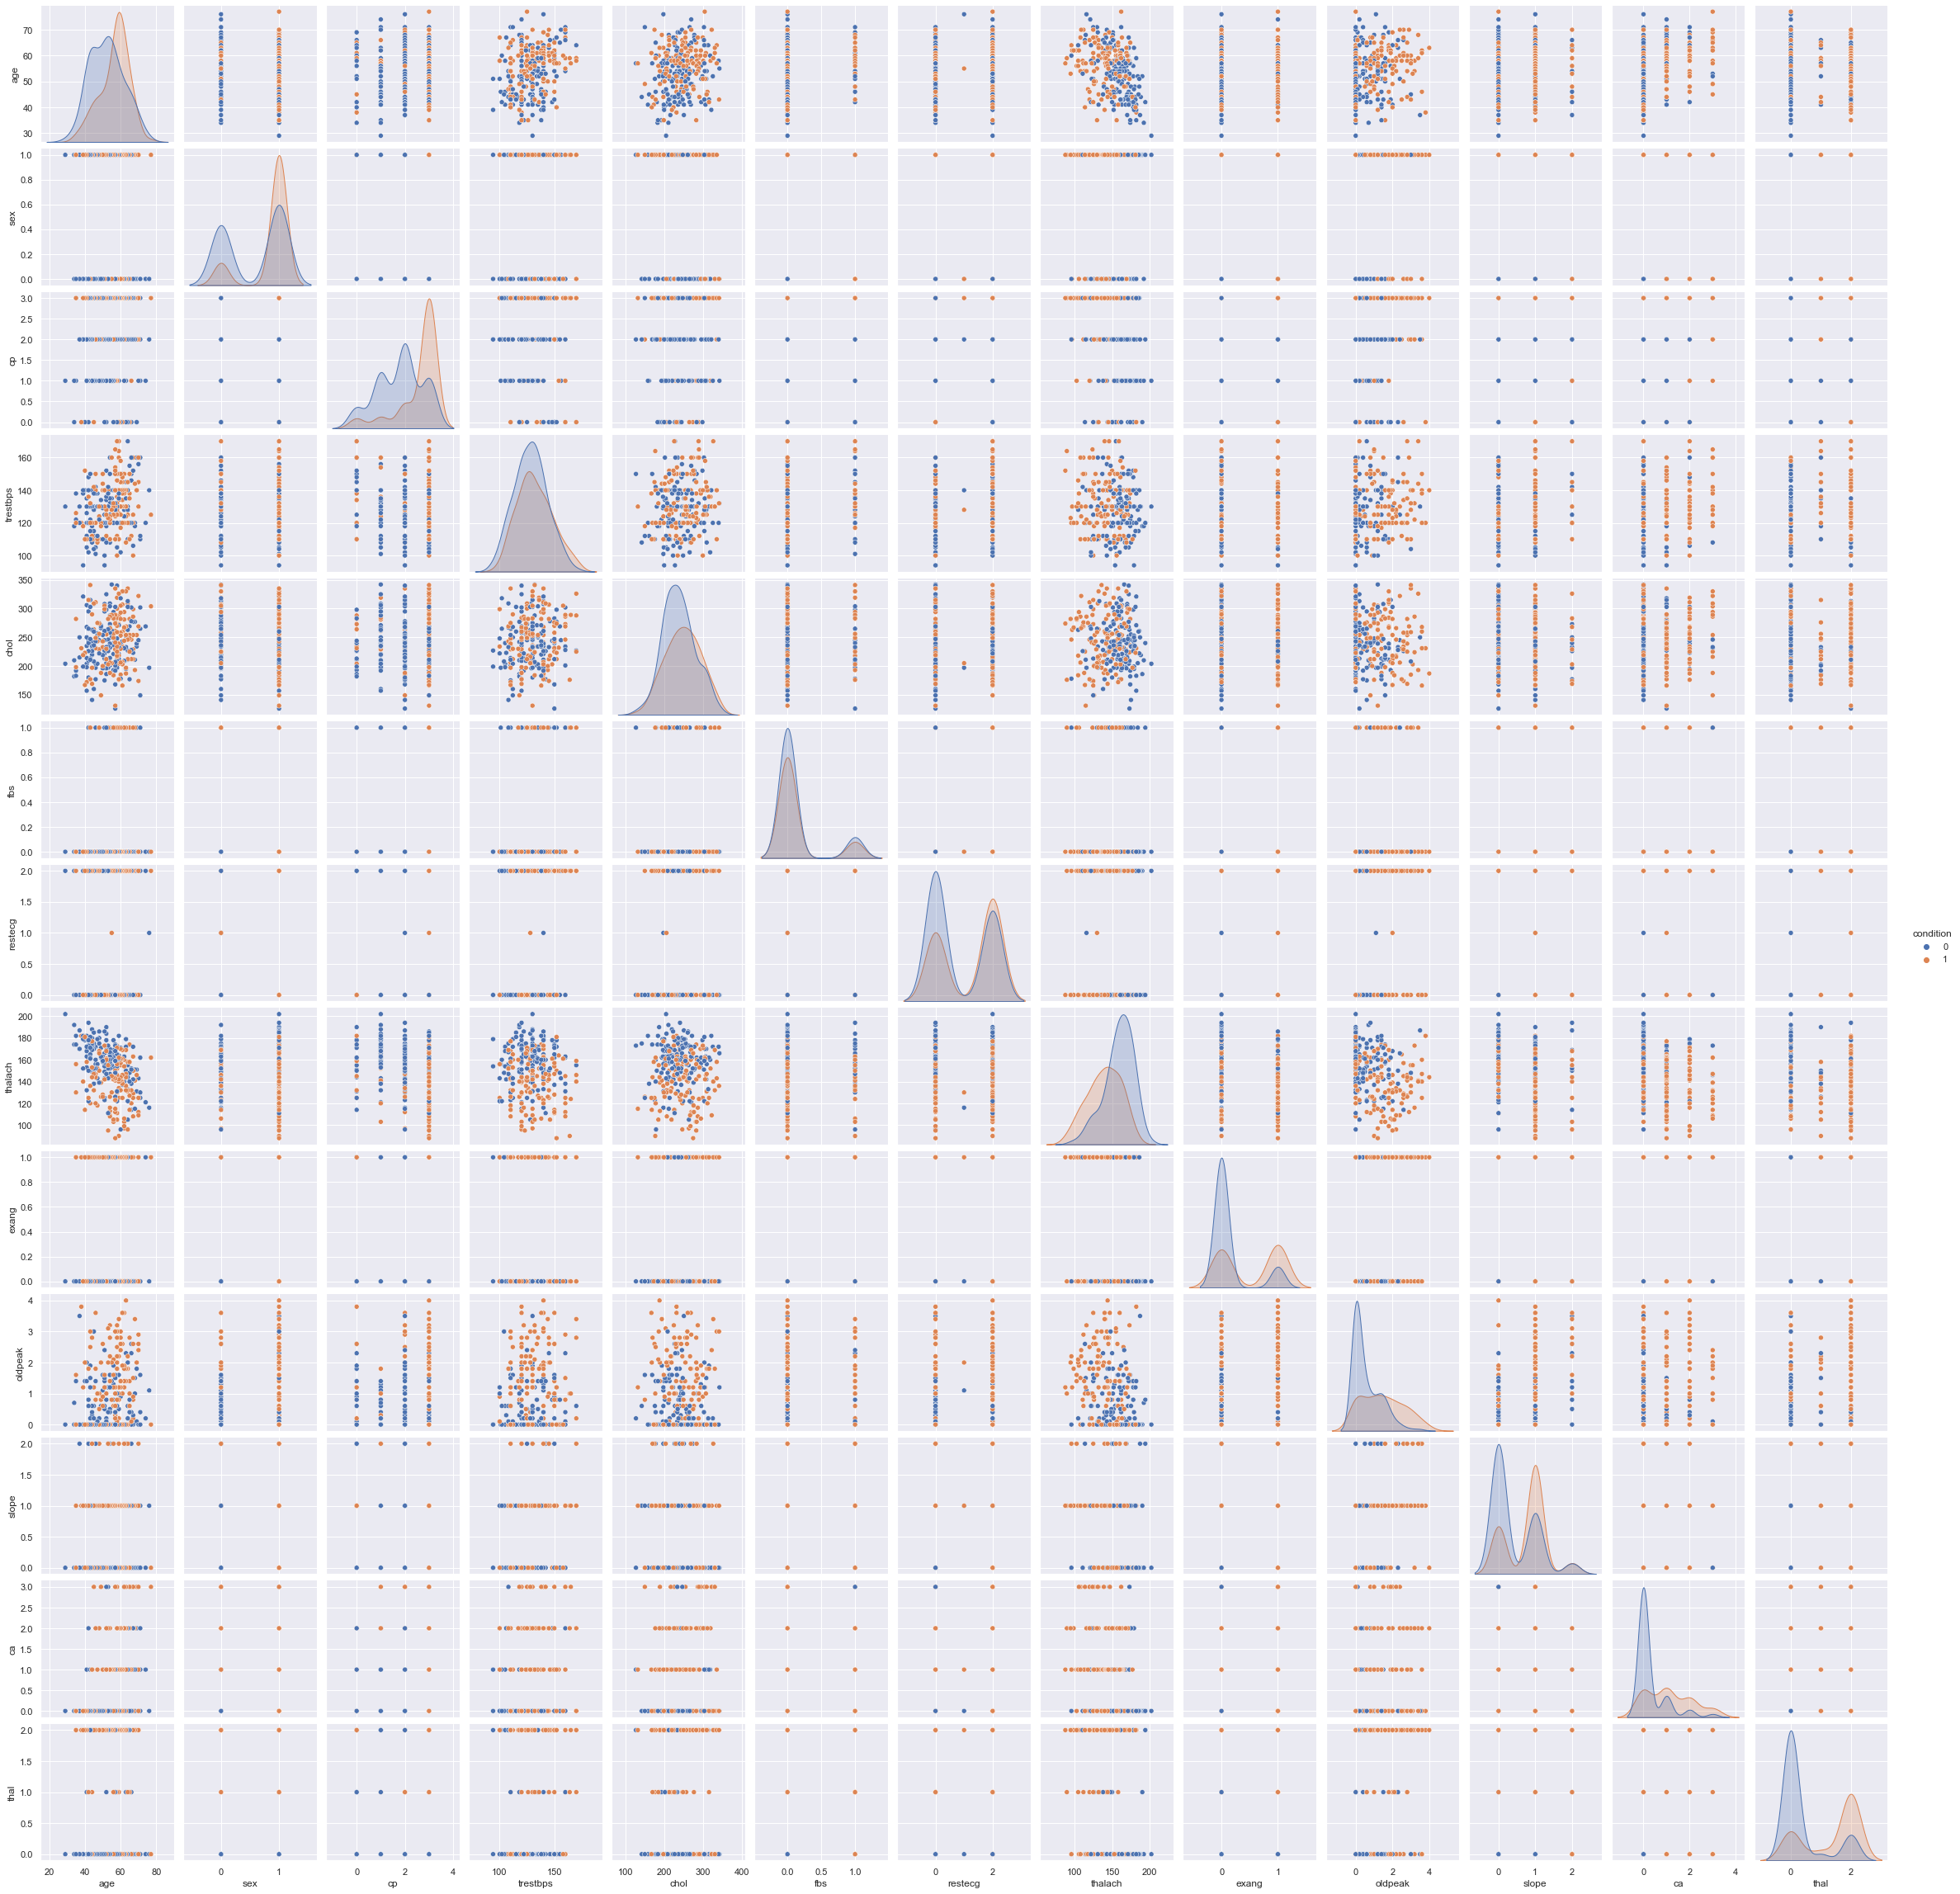

In [19]:
#pair plot, with hue as condition, so that we can see the miltivariate analysis.
sns.pairplot(df,hue='condition')

### Splitting the dataset

In [20]:
#X variable contains all but the target, which is condition
X = df.drop('condition', axis=1)

In [21]:
#y is the target, the target is condition
y = df['condition']

### Splitting the dataset into train and test

In [22]:
#splitting into train and test, 20% goes to test and random state is there for repeatability. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the model

To build the model, we considered two algorithms: Random Forest and KNN. Both of them are Classification models

### Scaling the dataset

Scaling is an important process in the preprocessing step as it makes values in all the attributes scaled to a specific range. This is important because, if an attribute has large values, the model will be biased towards that particular attribute only. In order to eliminate the bias, we would use the scaling.

In [23]:
#scaling the values to uniform values
sc = preprocessing.StandardScaler()
#fitting
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree

In [24]:
#build model
model1 = DecisionTreeClassifier()

In [25]:
#fit
model1.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [26]:
#build model with 1000 decision trees
model2 = RandomForestClassifier(n_estimators=1000, criterion='gini')

In [27]:
#fit
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### KNN

### Elbow plot for KNN

An Elbow plot provides the right value for determining the number of neighbors for KNN

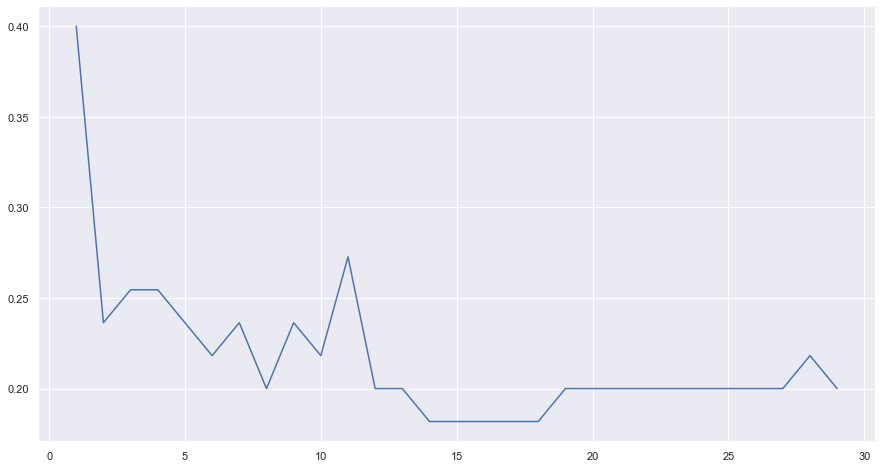

In [28]:
#plotting the elbow graph with neighbors from 1 to 30.
accs = []
for i in range(1,30):

    #each time, the neighbors value will be 1 to 30, then fit
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    #get the predictions
    y_pred = knn.predict(X_test)

    #get the mean squared error and append to accs list.
    accs.append(mean_squared_error(y_test, y_pred))

#plot the graph
plt.plot(range(1,30), accs)

Based on the elbow plot, the n_neighbors is chosen as 14

In [29]:
model3 = KNeighborsClassifier(n_neighbors = 14)

In [30]:
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

### Logistic Regression

In [31]:
#create an object for logistic regression
model4 = LogisticRegression()

In [32]:
#fit
model4.fit(X_train, y_train)

LogisticRegression()

### SVM Classifier

In [33]:
#object for SVM
model5 = SVC(C=0.8, gamma='auto', probability=True)

In [34]:
#fit
model5.fit(X_train, y_train)

SVC(C=0.8, gamma='auto', probability=True)

### Evaluating the results

### Comparison of all the models

In [60]:
#getting false positive rate and true positive rates of all the models
fpr1, tpr1, thresh1 = roc_curve(y_test, model1.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model2.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model3.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model4.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model5.predict_proba(X_test)[:, 1], pos_label = 1)

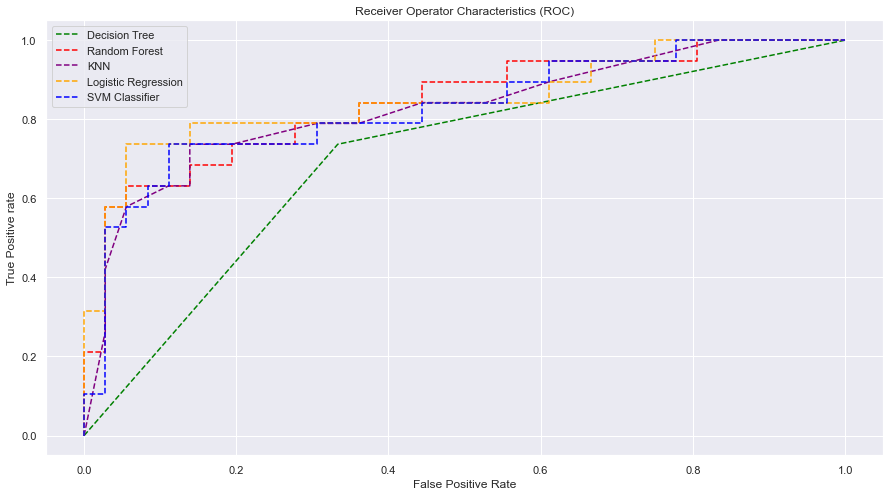

In [61]:

#plotting the graphs, each with a different color
plt.plot(fpr1, tpr1, linestyle = "--", color = "green", label = "Decision Tree")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "Random Forest")
plt.plot(fpr3, tpr3, linestyle = "--", color = "purple", label = "KNN")
plt.plot(fpr4, tpr4, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr5, tpr5, linestyle = "--", color = "blue", label = "SVM Classifier")


#setting title, and x,y labels
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

#legend
plt.legend(loc = 'best')
plt.show()

The graph that is leaning to the left is the best one.
From the ROC curve, it is evident that the logistic regression is the most optimal model of all the models.

### Summary of the findings

#### The age distribution looks to be typical, with the bulk of the patients in their 50s. 
#### Male patients consult at a higher rate than female patients in every age group. 
#### The number of male patients with the condition was greater than the number of female patients. 
#### Outliers in four criteria have to be removed. 
#### As classification models, Decision Tree, Random Forest, KNN, Logistic Regression, and SVM were employed. 
#### The nearest neighbor distance is used by KNN to classify diseases. The nearest neighbor count was set at seven in this case. 
#### Random Forest is an ensemble model, meaning it is made up of a variety of decision trees. As per the theory, a random forest (a collection of decision trees) would outperform a single decision tree because the result is coming from a combination of decision trees.
#### The odds are used in logistic regression. 
#### Based on the judgments made at each node, the decision tree creates a categorization flow. 
#### For logistic regression and decision tree, the default settings are left untouched. 
#### To separate the datapoints, SVM uses a hyperplane. The parameters for SVM were adjusted as follows: C: 0.8, gamma:'auto,' and probability was set to True to plot ROC curves.

### Further Analysis

##### This is open to further analysis and improvements.
##### Following analysis could be beneficial in the future.
- Understanding what other attributes correspond to the diseases
- Increasing the attribute count or making new attributes based on the current ones.
- Building novel models with better accuracy.
- Building more number of models and comparing the results.